In [1]:
!pip install --user sodapy

You are using pip version 8.1.2, however version 21.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import sodapy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sodapy import Socrata


client = Socrata("data.cdc.gov", None)


results = client.get("n8mc-b4w4", limit=15000)


results_df = pd.DataFrame.from_records(results)

In [3]:
results_df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27,DODGE,27039,18 to 49 years,NA,NA,NA,-1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,NaN
1,2020-11,MI,26,GLADWIN,26051,18 to 49 years,NA,NA,NA,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2021-04,VT,50,ORLEANS,50019,18 to 49 years,NA,NA,NA,0.0,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,NA,Yes
3,2020-11,AL,01,LIMESTONE,01083,0 - 17 years,Female,Missing,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2021-01,NY,36,SCHOHARIE,36095,0 - 17 years,Female,NA,NA,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


In [4]:
for col in results_df.columns:
    if results_df[col].dtype == object:
        count = 0
        count = [count + 1 for x in results_df[col] if x == 'Missing'or pd.isna(x)]
        print(col + ' ' + str(sum(count)))

case_month 0
res_state 0
state_fips_code 0
res_county 0
county_fips_code 0
age_group 124
sex 30
race 2193
ethnicity 2527
case_positive_specimen 10050
case_onset_interval 7830
process 14204
exposure_yn 13059
current_status 0
symptom_status 6385
hosp_yn 6910
icu_yn 12493
death_yn 4832
underlying_conditions_yn 14033


I am counting the number of missing entries in each column. To do this I am increasing count everytime there is missing or NaN

In [5]:
results_df.drop('process', axis = 1, inplace = True)
results_df.drop('icu_yn', axis = 1, inplace = True)
results_df.drop('underlying_conditions_yn', axis = 1, inplace = True)
results_df.drop('exposure_yn', axis = 1, inplace = True)
results_df.drop('case_positive_specimen', axis = 1, inplace = True)
results_df.fillna({"sex":"Missing","race":"Missing"})
# combinding the missing group 
results_df['age_group'] = results_df['age_group'].replace(['NA'],'Missing')
results_df['ethnicity'] = results_df['ethnicity'].replace(['NA','Unknown'],'Missing')
results_df['sex'] = results_df['sex'].replace(['NA','Unknown'],'Missing')

In [6]:
results_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_onset_interval,current_status,symptom_status,hosp_yn,death_yn
0,2020-12,MN,27,DODGE,27039,18 to 49 years,Missing,NA,Missing,0.0,Laboratory-confirmed case,Symptomatic,Missing,No
1,2020-11,MI,26,GLADWIN,26051,18 to 49 years,Missing,NA,Missing,NaN,Laboratory-confirmed case,Missing,Missing,Unknown
2,2021-04,VT,50,ORLEANS,50019,18 to 49 years,Missing,NA,Missing,0.0,Laboratory-confirmed case,Symptomatic,No,NA
3,2020-11,AL,01,LIMESTONE,01083,0 - 17 years,Female,Missing,Missing,NaN,Laboratory-confirmed case,Missing,Missing,Missing
4,2021-01,NY,36,SCHOHARIE,36095,0 - 17 years,Female,NA,Missing,NaN,Laboratory-confirmed case,Missing,Missing,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2020-08,NC,37,MONTGOMERY,37123,18 to 49 years,Female,NA,Missing,NaN,Laboratory-confirmed case,Asymptomatic,Unknown,No
14996,2020-08,GA,13,PICKENS,13227,18 to 49 years,Female,Unknown,Missing,NaN,Laboratory-confirmed case,Missing,Missing,Missing
14997,2020-12,KY,21,PIKE,21195,18 to 49 years,Female,Missing,Missing,NaN,Laboratory-confirmed case,Missing,Missing,Missing
14998,2020-08,OH,39,ROSS,39141,18 to 49 years,Female,NA,Missing,0.0,Laboratory-confirmed case,Symptomatic,No,No


In [7]:
for col in results_df.columns:
    if results_df[col].dtype == object:
        count = 0
        count = [count + 1 for x in results_df[col] if x == 'Missing'or pd.isna(x)]
        print(col + ' ' + str(sum(count)))

case_month 0
res_state 0
state_fips_code 0
res_county 0
county_fips_code 0
age_group 154
sex 684
race 2193
ethnicity 9225
case_onset_interval 7830
current_status 0
symptom_status 6385
hosp_yn 6910
death_yn 4832


I am dropping all columns with more than 10000 missing or nan entries and combined all the missing catagroy to 1 group.

<AxesSubplot:xlabel='age_group'>

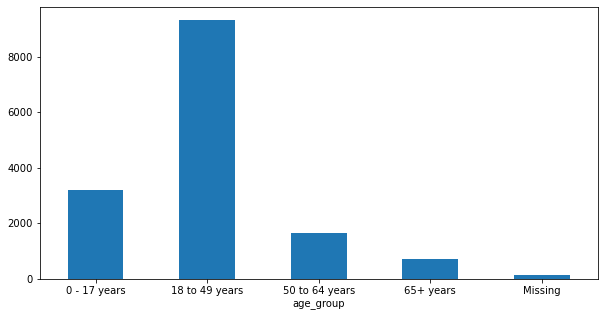

In [8]:
results_df.groupby('age_group')['current_status'].count().plot(kind='bar', rot=0, figsize=(10,5))

The graph show the number of cases of each age group.

<AxesSubplot:xlabel='ethnicity'>

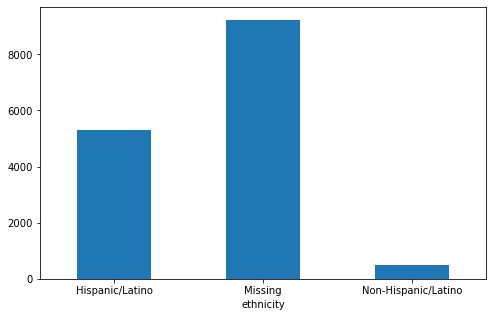

In [9]:
results_df.groupby('ethnicity')['current_status'].count().plot(kind='bar', rot=0, figsize=(8,5))

The graph shows the number of cases of each ethnicity. 

In [10]:
print(results_df[results_df['symptom_status']=='Symptomatic']['symptom_status'].count()/results_df['symptom_status'].count()*100 ,"percent showed symptoms")

46.53333333333333 percent showed symptoms


<AxesSubplot:xlabel='age_group'>

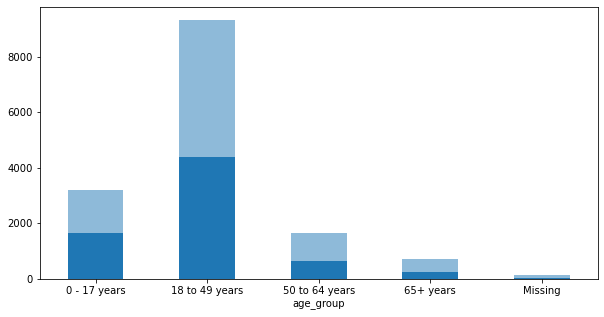

In [11]:
age = results_df[results_df['symptom_status']=='Symptomatic']
age.groupby('age_group')['symptom_status'].count().plot(kind='bar', rot=0, figsize=(10,5))
results_df.groupby('age_group')['symptom_status'].count().plot(kind='bar', rot=0, figsize=(10,5), alpha =0.5)

The graph shows the percentage of each age group that has a "Systomatic" status 

<AxesSubplot:xlabel='ethnicity'>

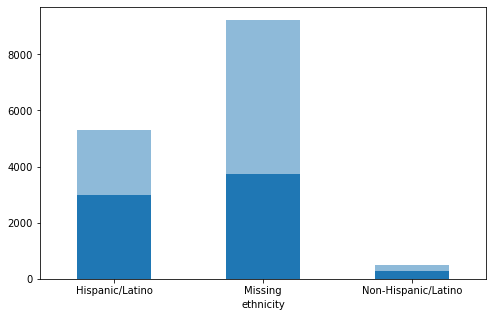

In [12]:
ethnicity = results_df[results_df['symptom_status']=='Symptomatic']
ethnicity.groupby('ethnicity')['symptom_status'].count().plot(kind='bar', rot=0, figsize=(8,5))
results_df.groupby('ethnicity')['symptom_status'].count().plot(kind='bar', rot=0, figsize=(8,5), alpha =0.5)

The graph shows the percentage of each ethnicity  group that has a "Systomatic" status.

<AxesSubplot:xlabel='sex'>

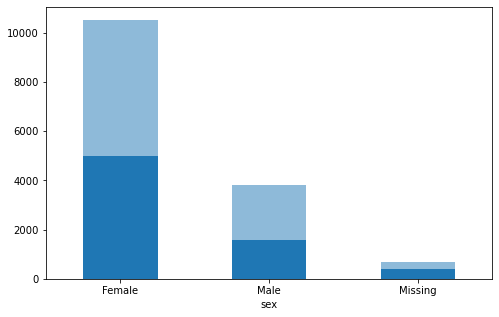

In [13]:
sex = results_df[results_df['symptom_status']=='Symptomatic']
sex.groupby('sex')['symptom_status'].count().plot(kind='bar', rot=0, figsize=(8,5))
results_df.groupby('sex')['symptom_status'].count().plot(kind='bar', rot=0, figsize=(8,5), alpha =0.5)

The graph shows the percentage of each sex group that has a "Systomatic" status.

In [14]:
riverside = client.get("n8mc-b4w4",res_state="CA",res_county="RIVERSIDE", limit=5000)

riverside_df = pd.DataFrame.from_records(riverside)
riverside_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_onset_interval,underlying_conditions_yn
0,2020-08,CA,06,RIVERSIDE,06065,0 - 17 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,No,NaN,NaN
1,2020-08,CA,06,RIVERSIDE,06065,0 - 17 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,0.0,NaN
2,2020-08,CA,06,RIVERSIDE,06065,0 - 17 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,1.0,NaN
3,2020-08,CA,06,RIVERSIDE,06065,0 - 17 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,0.0,NaN
4,2020-08,CA,06,RIVERSIDE,06065,0 - 17 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2021-01,CA,06,RIVERSIDE,06065,50 to 64 years,Male,Unknown,Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,NaN,NaN
4996,2021-01,CA,06,RIVERSIDE,06065,50 to 64 years,Male,Unknown,Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Unknown,Missing,Missing,No,NaN,NaN
4997,2021-01,CA,06,RIVERSIDE,06065,50 to 64 years,Male,Unknown,Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Unknown,Missing,Missing,No,NaN,NaN
4998,2021-01,CA,06,RIVERSIDE,06065,50 to 64 years,Male,Unknown,Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,NaN


The dataframe shows 5000 cases from riverside county 

<AxesSubplot:xlabel='case_month'>

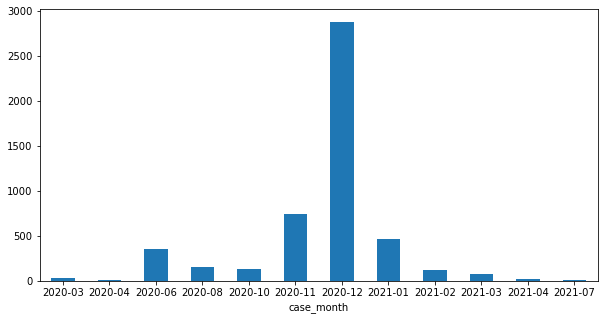

In [15]:
riverside_df.groupby('case_month')['race'].count().plot(kind='bar', rot=0, figsize=(10,5))

The graph shows the timeline of the cases grow in riverside county 

<AxesSubplot:xlabel='age_group'>

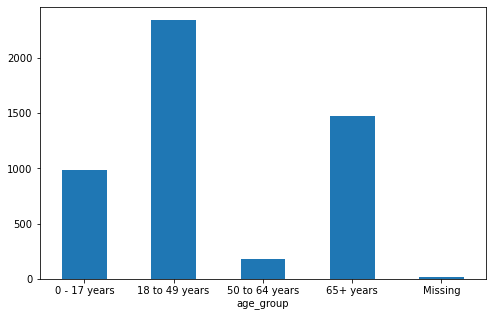

In [16]:
riverside_df.groupby('age_group')['race'].count().plot(kind='bar', rot=0, figsize=(8,5))

This graph shows the age distribution of riverside county 